**WEB** **SCRAPING**

# Scraping Top Repositories for Topics on GitHub

TODO  (Intro):
- Introduction about web scraping
- Introduction about GitHub and the problem statement
- Mention the tools you're using (Python, requests, Beautiful Soup, Pandas)


Here are the steps we'll follow:

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top repositories in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we'll create a CSV file in the following format:

```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,18300,https://github.com/libgdx/libgdx
```

### Use the requests library to download web pages

In [1]:
!pip install requests --upgrade --quiet

In [2]:
import requests

In [3]:
topics_url = 'https://github.com/topics'

In [4]:
response = requests.get(topics_url)

In [5]:
response.status_code

200

In [6]:
len(response.text)

185552

In [7]:
page_contents = response.text

In [8]:
page_contents[:500]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubus'

In [16]:
# creates a file with page_contents
with open('webpage.html', 'w') as f:
    f.write(page_contents)

### Use Beautiful Soup to parse and extract information

In [10]:
!pip install beautifulsoup4 --upgrade --quiet

In [11]:
from bs4 import BeautifulSoup

In [12]:
doc = BeautifulSoup(page_contents, 'html.parser')

In [21]:
p_tags = doc.findAll('p')
p_tags

[<p>We read every piece of feedback, and take your input very seriously.</p>,
 <p class="text-small color-fg-muted">
             To see all available qualifiers, see our <a class="Link--inTextBlock" href="https://docs.github.com/search-github/github-code-search/understanding-github-code-search-syntax">documentation</a>.
           </p>,
 <p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Perl
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Perl is a highly capable and feature-rich programming language.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         C
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">C is a general purpose programming language that first appeared in 1972.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Markdown
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 m

In [13]:
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'

topic_title_tags = doc.find_all('p', {'class': selection_class})

In [14]:
len(topic_title_tags)

30

In [15]:
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

In [23]:
desc_selector = 'f5 color-fg-muted mb-0 mt-1'
topic_desc_tags = doc.find_all('p', {'class': desc_selector})

In [24]:
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [25]:
topic_title_tag0 = topic_title_tags[0]

In [31]:
topic_title_tag0.parent.parent

<div class="py-4 border-bottom d-flex flex-justify-between">
<a class="no-underline flex-grow-0" href="/topics/3d">
<div class="color-bg-accent f4 color-fg-muted text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
</a>
<a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-fg-muted mb-0 mt-1">
          3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
        </p>
</a>
<div class="flex-grow-0">
<div class="d-block" data-view-component="true">
<a aria-label="You must be signed in to star a repository" class="tooltipped tooltipped-s btn-sm btn" data-hydro-click='{"event_type":"authentication.click","payload":{"location_in_page":"star button","repository_id":null,"auth_type":"LOG_IN","originating_url":"https://github.com/topics","user_id":null}}' data-hydro-click-hmac="7

In [34]:
div_tag = topic_title_tag0.parent
# where is this used

In [38]:
topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-1 d-flex flex-column'})

In [39]:
len(topic_link_tags)

30

In [42]:
topic_link_tags[0]

<a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-fg-muted mb-0 mt-1">
          3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
        </p>
</a>

In [43]:
topic_link_tags[0]['href']

'/topics/3d'

In [44]:
topic0_url = "https://github.com" + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [47]:
topic_title_tags[0].text

'3D'

In [45]:
topic_titles = []

for tag in topic_title_tags:
    topic_titles.append(tag.text)

print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [46]:
topic_descs = []

for tag in topic_desc_tags:
    topic_descs.append(tag.text.strip())

topic_descs[:5]

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

In [49]:
topic_urls = []
base_url = 'https://github.com'

for tag in topic_link_tags:
    topic_urls.append(base_url + tag['href'])

topic_urls[:5]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

In [50]:
!pip install pandas --quiet

In [51]:
import pandas as pd

In [52]:
topics_dict = {
    'title': topic_titles,
    'description': topic_descs,
    'url': topic_urls
}

In [53]:
topics_df = pd.DataFrame(topics_dict)

In [58]:
topics_df.head()

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


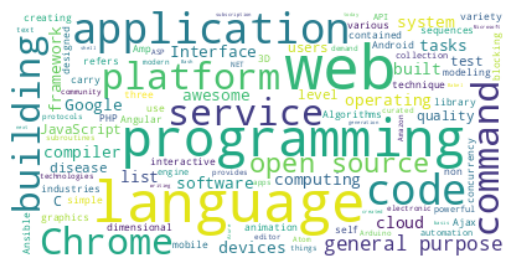

In [57]:
# @title Most Common Words in Topic Descriptions

import matplotlib.pyplot as plt
from wordcloud import WordCloud
words = ' '.join(topics_df['description'].tolist())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')

<Axes: >

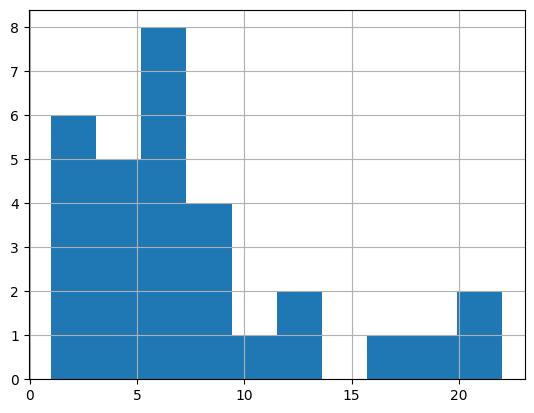

In [56]:
# @title Distribution of Topic Lengths

topics_df['title'].str.len().hist(bins=10)

In [59]:
topics_df.to_csv('topics.csv', index=None)

## Getting information out of a topic page

In [60]:
topic_page_url = topic_urls[0]

In [61]:
topic_page_url

'https://github.com/topics/3d'

In [62]:
response = requests.get(topic_page_url)

In [63]:
response.status_code

200

In [64]:
len(response.text)

503083

In [65]:
topic_doc = BeautifulSoup(response.text, 'html.parser')

In [70]:
h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class} )

In [71]:
repo_tags[0]

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c72fbd5c69a8ee7c9c53a4e65de2b93c8fc7552dd793945819639bc165c0f0ba" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4a2667db3d63a1739c412e059e5da95afe419df83f70949b5d59dc3478f5c79a" data-turbo="false" data-view-component="true" href

In [72]:
len(repo_tags)

20

In [73]:
a_tags = repo_tags[0].find_all('a')

In [76]:
a_tags[0].text.strip()

'mrdoob'

In [77]:
a_tags[1].text.strip()

'three.js'

In [78]:
base_url = 'https://github.com'
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


In [81]:
star_tags = topic_doc.find_all('span', { 'class': 'Counter js-social-count'})

In [82]:
len(star_tags)

20

In [83]:
star_tags[0].text.strip()

'98.2k'

In [84]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1]) * 1000)
    return int(stars_str)

In [85]:
parse_star_count(star_tags[0].text.strip())

98200

In [86]:
def get_repo_info(h1_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h1_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

In [87]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 98200, 'https://github.com/mrdoob/three.js')

In [88]:
topic_repos_dict = {
    'username': [],
    'repo_name': [],
    'stars': [],
    'repo_url': []
}


for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['stars'].append(repo_info[2])
    topic_repos_dict['repo_url'].append(repo_info[3])

In [89]:
topic_repos_dict

{'username': ['mrdoob',
  'pmndrs',
  'libgdx',
  'BabylonJS',
  'ssloy',
  'FreeCAD',
  'lettier',
  'aframevr',
  'CesiumGS',
  'blender',
  'MonoGame',
  'isl-org',
  'metafizzy',
  'timzhang642',
  'nerfstudio-project',
  'a1studmuffin',
  'domlysz',
  'FyroxEngine',
  'google',
  'openscad'],
 'repo_name': ['three.js',
  'react-three-fiber',
  'libgdx',
  'Babylon.js',
  'tinyrenderer',
  'FreeCAD',
  '3d-game-shaders-for-beginners',
  'aframe',
  'cesium',
  'blender',
  'MonoGame',
  'Open3D',
  'zdog',
  '3D-Machine-Learning',
  'nerfstudio',
  'SpaceshipGenerator',
  'BlenderGIS',
  'Fyrox',
  'model-viewer',
  'openscad'],
 'stars': [98200,
  25600,
  22600,
  22200,
  19100,
  17200,
  16900,
  16100,
  11700,
  11200,
  10700,
  10300,
  10200,
  9400,
  8300,
  7600,
  7200,
  7100,
  6400,
  6400],
 'repo_url': ['https://github.com/mrdoob/three.js',
  'https://github.com/pmndrs/react-three-fiber',
  'https://github.com/libgdx/libgdx',
  'https://github.com/BabylonJS/Babyl

In [90]:
topic_repos_dict = pd.DataFrame(topic_repos_dict)

In [91]:
topic_repos_dict

,username,repo_name,stars,repo_url
0,mrdoob,three.js,98200,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,25600,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,22600,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,22200,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,19100,https://github.com/ssloy/tinyrenderer
5,FreeCAD,FreeCAD,17200,https://github.com/FreeCAD/FreeCAD
6,lettier,3d-game-shaders-for-beginners,16900,https://github.com/lettier/3d-game-shaders-for...
7,aframevr,aframe,16100,https://github.com/aframevr/aframe
8,CesiumGS,cesium,11700,https://github.com/CesiumGS/cesium
9,blender,blender,11200,https://github.com/blender/blender


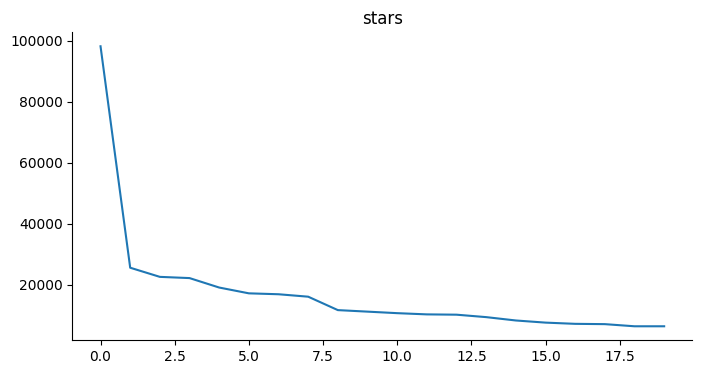

In [93]:
# @title stars

from matplotlib import pyplot as plt
topic_repos_dict['stars'].plot(kind='line', figsize=(8, 4), title='stars')
plt.gca().spines[['top', 'right']].set_visible(False)

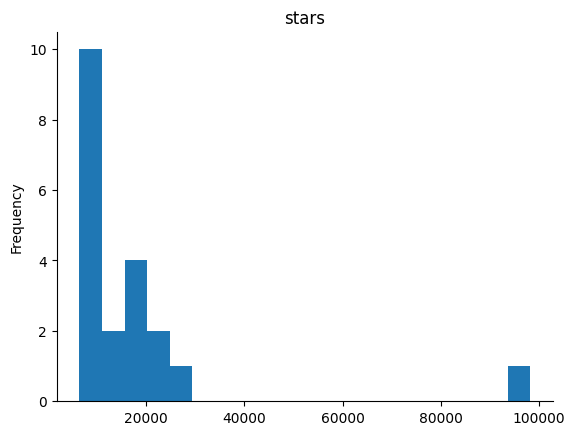

In [92]:
# @title stars

from matplotlib import pyplot as plt
topic_repos_dict['stars'].plot(kind='hist', bins=20, title='stars')
plt.gca().spines[['top', 'right',]].set_visible(False)

FINAL CODE

In [96]:
import os

def get_topic_page(topic_url):
    # Download the page
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

In [97]:
def get_repo_info(h1_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h1_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

In [98]:
def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class} )
    # Get star tags
    star_tags = topic_doc.find_all('span', { 'class': 'Counter js-social-count'})

    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])

    return pd.DataFrame(topic_repos_dict)

In [99]:
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)


Write a single function to :
1. Get the list of topics from the topics page
2. Get the list of top repos from the individual topic pages
3. For each topic, create a CSV of the top repos for the topic



In [102]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

def get_topic_descs(doc):
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-1 d-flex flex-column'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls


def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topics_url))
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

In [103]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()

    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

In [104]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
Scraping top repositories for "Ajax"
Scraping top repositories for "Algorithm"
Scraping top repositories for "Amp"
Scraping top repositories for "Android"
Scraping top repositories for "Angular"
Scraping top repositories for "Ansible"
Scraping top repositories for "API"
Scraping top repositories for "Arduino"
Scraping top repositories for "ASP.NET"
Scraping top repositories for "Atom"
Scraping top repositories for "Awesome Lists"
Scraping top repositories for "Amazon Web Services"
Scraping top repositories for "Azure"
Scraping top repositories for "Babel"
Scraping top repositories for "Bash"
Scraping top repositories for "Bitcoin"
Scraping top repositories for "Bootstrap"
Scraping top repositories for "Bot"
Scraping top repositories for "C"
Scraping top repositories for "Chrome"
Scraping top repositories for "Chrome extension"
Scraping top repositories for "Command line interface"
Scraping top repositories for "Clojure"
Scrapin

###Final Code